# Elabora un sencillo programa para descargar del fichero cotiz_GRIF.csv las cotizaciones mínimas en cada sesión (vuélcalas a una variable denominada minimos) y muéstralas a través de la consola para comprobar que lo has realizado correctamente.

#### *Cargamos las librerias necesarias*

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 
import os

#### *Carga el archivo CSV para leer su contenido usando la libreria Pandas. al abrirlo se convierte en un dataframe*

In [3]:
print(os.getcwd())

C:\Users\Usuario\OneDrive\Python\000Curso Machine Learning - Python\Librerias_Machine_learning\actividad_practica_cargando_minimos


In [5]:
coti = pd.read_csv('cotiz_GRIF.csv')
print(f'Encabezados del fichero: {coti.columns.values}')

Encabezados del fichero: ['Fecha;Cierre;Referencia;Volumen;Efectivo;Último;Máximo;Mínimo;Medio']


#### *otra forma de cargar el archivo CSV para leer su contenido usando la libreria CSV*

In [7]:
with open('cotiz_GRIF.csv') as f:
    lectura = csv.reader(f, delimiter=';')
    encabezados = next(lectura)
    fecha = []
    minimos = []
    maximos = []
    for fila in lectura:
        v_fila_fecha = datetime.strptime(fila[0], '%d/%m/%Y')
        v_fila = float(fila[7])
        v_fila_max = float(fila[6])
        fecha.append(v_fila_fecha)
        minimos.append(v_fila)
        maximos.append(v_fila_max)

print(fecha)
print(maximos)
print(minimos)

[datetime.datetime(2021, 7, 1, 0, 0), datetime.datetime(2021, 7, 2, 0, 0), datetime.datetime(2021, 7, 5, 0, 0), datetime.datetime(2021, 7, 6, 0, 0), datetime.datetime(2021, 7, 7, 0, 0), datetime.datetime(2021, 7, 8, 0, 0), datetime.datetime(2021, 7, 9, 0, 0), datetime.datetime(2021, 7, 12, 0, 0), datetime.datetime(2021, 7, 13, 0, 0), datetime.datetime(2021, 7, 14, 0, 0), datetime.datetime(2021, 7, 15, 0, 0), datetime.datetime(2021, 7, 16, 0, 0), datetime.datetime(2021, 7, 19, 0, 0), datetime.datetime(2021, 7, 20, 0, 0), datetime.datetime(2021, 7, 21, 0, 0), datetime.datetime(2021, 7, 22, 0, 0), datetime.datetime(2021, 7, 23, 0, 0), datetime.datetime(2021, 7, 26, 0, 0), datetime.datetime(2021, 7, 27, 0, 0), datetime.datetime(2021, 7, 28, 0, 0), datetime.datetime(2021, 7, 29, 0, 0), datetime.datetime(2021, 7, 30, 0, 0), datetime.datetime(2021, 8, 2, 0, 0), datetime.datetime(2021, 8, 3, 0, 0), datetime.datetime(2021, 8, 4, 0, 0), datetime.datetime(2021, 8, 5, 0, 0), datetime.datetime(2021

### Generando la grafica

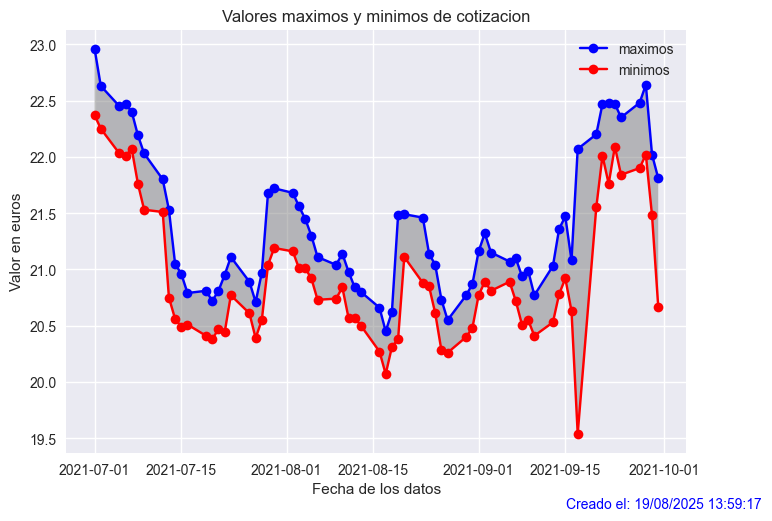

In [21]:
plt.style.use('seaborn-v0_8') # define el estilo de la grafica
fig,ax = plt.subplots() # crea y define el tamaño de la ventana del grafico
ax.plot(fecha, maximos, c='blue', marker='o', label='maximos')# muestra los maximos con linea azul
ax.plot(fecha, minimos, c='red', marker='o', label = 'minimos')# muetra los minimos con linea red

plt.fill_between(fecha, maximos, minimos,facecolor='grey',alpha=0.5) # rellena el espacio entre las dos lineas de la grafica

ax.legend()# añade una pequeña leyenda de a que corresponde cada linea del grafico

plt.title('Valores maximos y minimos de cotizacion')
plt.ylabel('Valor en euros')
plt.xlabel('Fecha de los datos')

# se guarda la fecha y hora en una variable para imprimirla sobre la grafica en la esquina inferior derecha
ahora = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
fig.text(0.75,0.01, f'Creado el: {ahora}',
         color='blue')

plt.show()# muestra la grafica por pantalla